# Task 3 of Data Science and business Analytics

### As a business manager, try to find out the weak areas where you can  work to make more profit.What all business problems you can derive by exploring the data?  


In [7]:
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (6, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [8]:
df= pd.read_csv('SampleSuperstore.csv')

In [9]:
df

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


In [10]:
df.isna().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [11]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


### Comparing Profit And Sales Of Different Categories

In [12]:
mean_by_category=df.groupby('Category').mean('Sales')
mean_by_category[['Profit','Sales']]

,Profit,Sales
Category,,
Furniture,8.699327,349.834887
Office Supplies,20.327050,119.324101
Technology,78.752002,452.709276


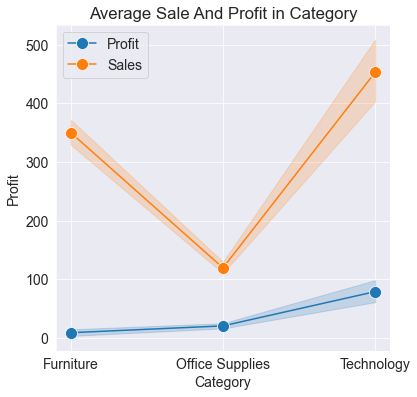

In [37]:
sns.lineplot(data=df,x="Category",y="Profit",marker='o',markersize =12);
sns.lineplot(data=df,x="Category",y="Sales",marker='o',markersize =12);
plt.legend(['Profit', 'Sales'])
plt.title('Average Sale And Profit in Category');

### Comparing Profit and Sales Of Different Shipping Mode

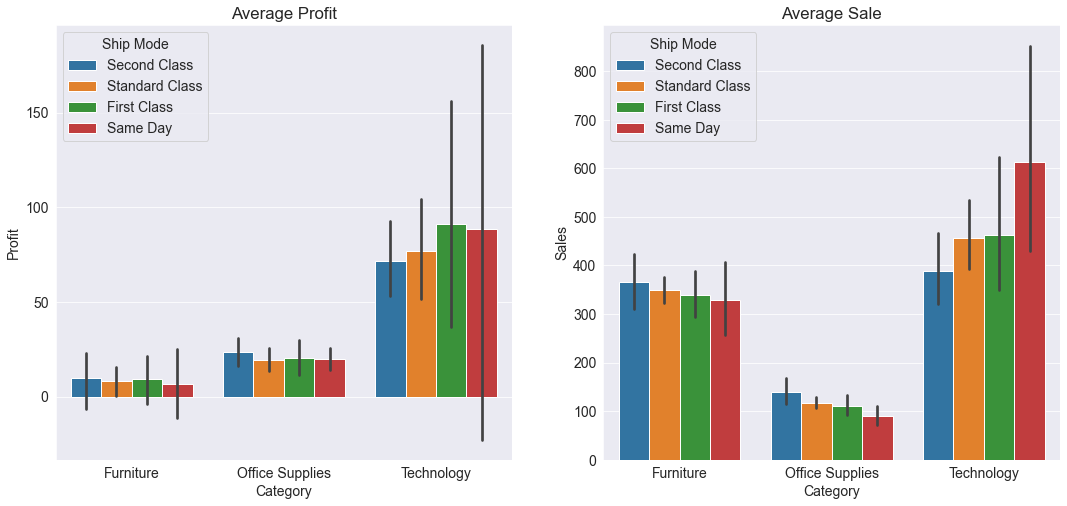

In [14]:
fig, axes = plt.subplots(1,2, figsize=(18, 8))

axes[0].set_title('Average Profit')
sns.barplot(x="Category", y="Profit", hue="Ship Mode",data=df, ax=axes[0])

axes[1].set_title('Average Sale')
sns.barplot(x="Category", y="Sales",  hue="Ship Mode",data=df, ax=axes[1]);

In [21]:
Ship_mode = df.groupby(['Ship Mode'])[['Sales', 'Profit']].mean()
Ship_mode

,Sales,Profit
Ship Mode,,
First Class,228.497024,31.839948
Same Day,236.396179,29.266591
Second Class,236.089239,29.535545
Standard Class,227.583067,27.494770


c:\users\sneha maiti\appdata\local\programs\python\python38-32\lib\site-packages\pandas\plotting\_matplotlib\tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


array([<AxesSubplot:ylabel='Sales'>, <AxesSubplot:ylabel='Profit'>],
      dtype=object)

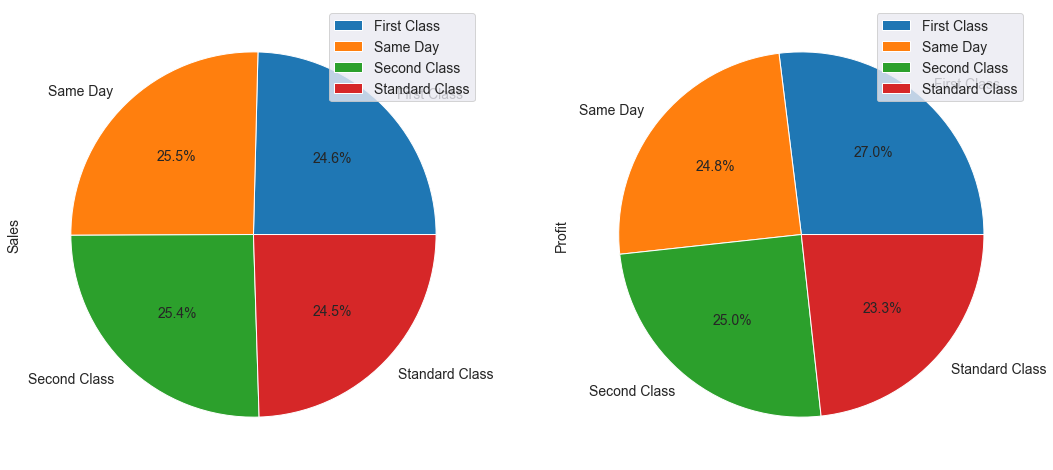

In [44]:
Ship_mode.plot.pie(subplots=True,figsize=(18, 20),  autopct='%1.1f%%', labels = Ship_mode.index)

- Profit and Discount is high in First Class
- Sales is high for Same day ship

### Comparing Profit And Sales Of Different Segments

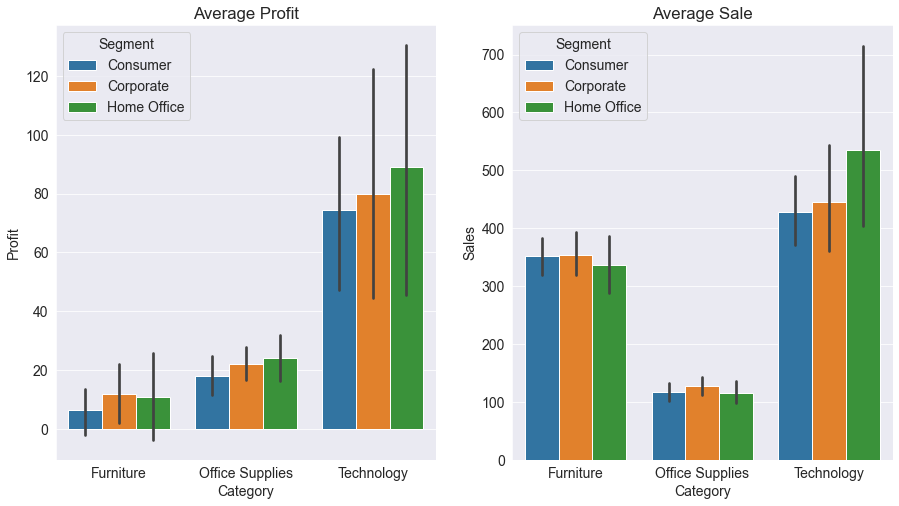

In [13]:
fig, axes = plt.subplots(1,2, figsize=(15, 8))

axes[0].set_title('Average Profit')
sns.barplot(x="Category", y="Profit", hue="Segment",data=df, ax=axes[0])

axes[1].set_title('Average Sale')
sns.barplot(x="Category", y="Sales",  hue="Segment",data=df, ax=axes[1]);

In [39]:
segment=df.groupby(['Segment'])[['Sales', 'Profit']].mean()
segment

,Sales,Profit
Segment,,
Consumer,223.733644,25.836873
Corporate,233.823300,30.456667
Home Office,240.972041,33.818664


c:\users\sneha maiti\appdata\local\programs\python\python38-32\lib\site-packages\pandas\plotting\_matplotlib\tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


array([<AxesSubplot:ylabel='Sales'>, <AxesSubplot:ylabel='Profit'>],
      dtype=object)

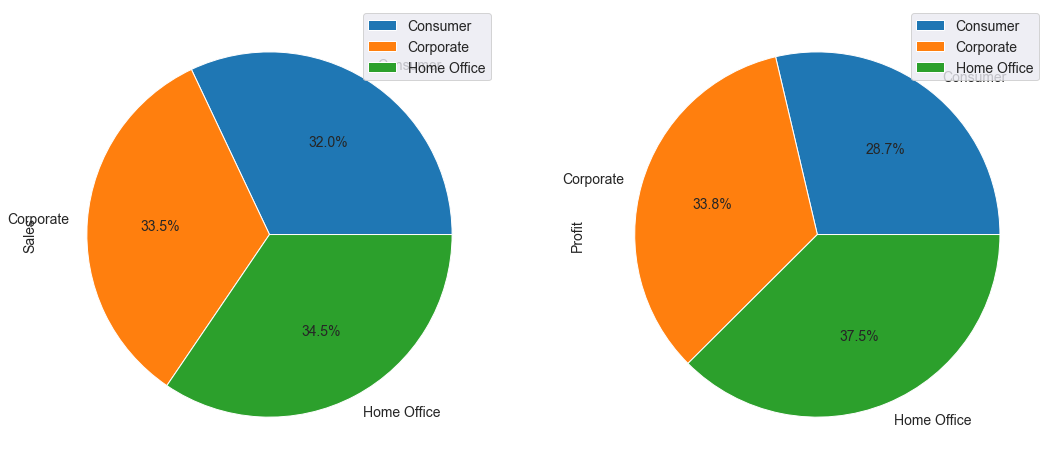

In [45]:
segment.plot.pie(subplots=True,figsize=(18, 20),  autopct='%1.1f%%', labels = segment.index)


### Comparing Profit and Sales of Different sub-Category Item

In [26]:
mean_by_Subcategory=df.groupby(['Sub-Category','Category']).mean('Sales')
mean_by_Subcategory=mean_by_Subcategory[['Sales','Discount','Profit']].sort_values('Profit')
mean_by_Subcategory

,,Sales,Discount,Profit
Sub-Category,Category,,,
Tables,Furniture,648.794771,0.261285,-55.565771
Bookcases,Furniture,503.859633,0.211140,-15.230509
Supplies,Office Supplies,245.650200,0.076842,-6.258418
Fasteners,Office Supplies,13.936774,0.082028,4.375660
Art,Office Supplies,34.068834,0.074874,8.200737
Furnishings,Furniture,95.825668,0.138349,13.645918
Labels,Office Supplies,34.303055,0.068681,15.236962
Binders,Office Supplies,133.560560,0.372292,19.843574
Paper,Office Supplies,57.284092,0.074891,24.856620


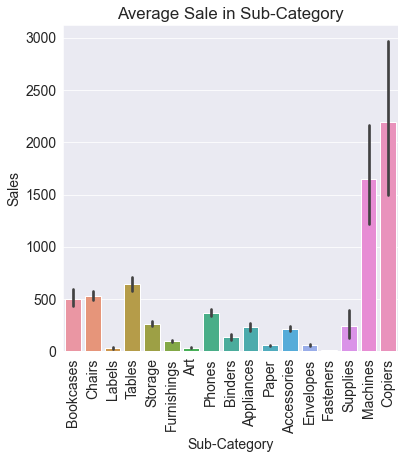

In [27]:
plt.title('Average Sale in Sub-Category')
sns.barplot(x="Sub-Category", y="Sales", data=df)
plt.xticks(rotation=90)
plt.show();

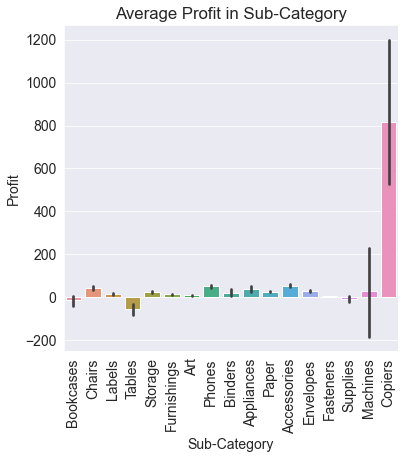

In [28]:
plt.title('Average Profit in Sub-Category')
sns.barplot(x="Sub-Category", y="Profit", data=df)
plt.xticks(rotation=90)
plt.show();

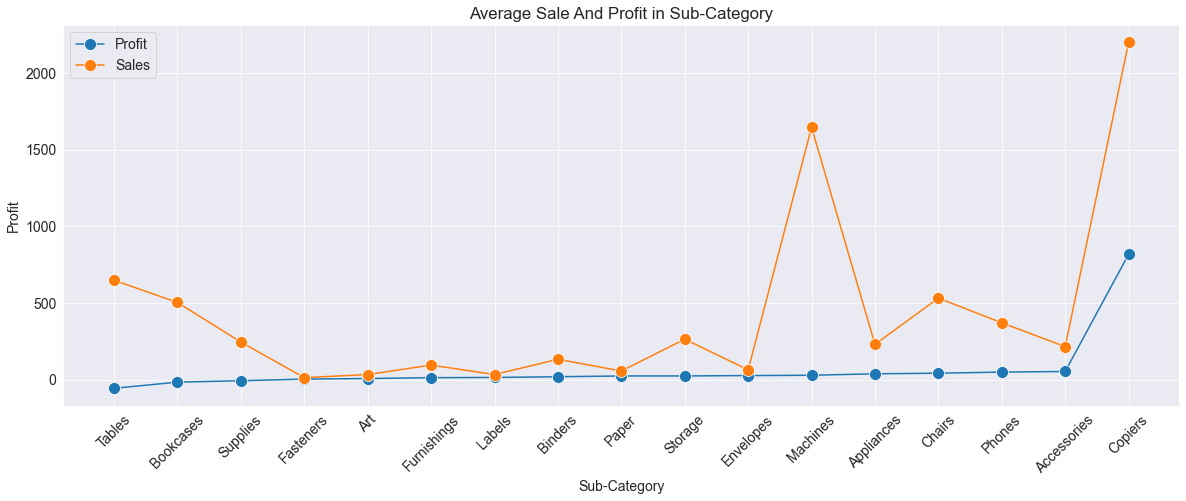

In [29]:
plt.figure(figsize=(20,7))
plt.title('Average Sale And Profit in Sub-Category')
sns.lineplot(data=mean_by_Subcategory,x="Sub-Category",y="Profit",marker='o',markersize =12);
sns.lineplot(data=mean_by_Subcategory,x="Sub-Category",y="Sales",marker='o',markersize =12);
plt.legend(['Profit', 'Sales'])
plt.xticks(rotation=45)
plt.show();

The Graph Shows the Average Sales And Average Profit Of Different Sub-Categorie.

### Comparing Profit of Different States

In [30]:
mean_by_state=df.groupby(['State']).mean('Sales')

In [34]:
mean_by_state[['Sales','Profit']].sort_values('Profit').head(20)

,Sales,Profit
State,,
Ohio,166.861697,-36.186304
Colorado,176.418231,-35.867351
North Carolina,223.305880,-30.083985
Tennessee,167.551219,-29.189583
Pennsylvania,198.487077,-26.507598
Texas,172.779742,-26.121174
Illinois,162.939230,-25.625787
Arizona,157.508933,-15.303235
Oregon,140.573790,-9.600569


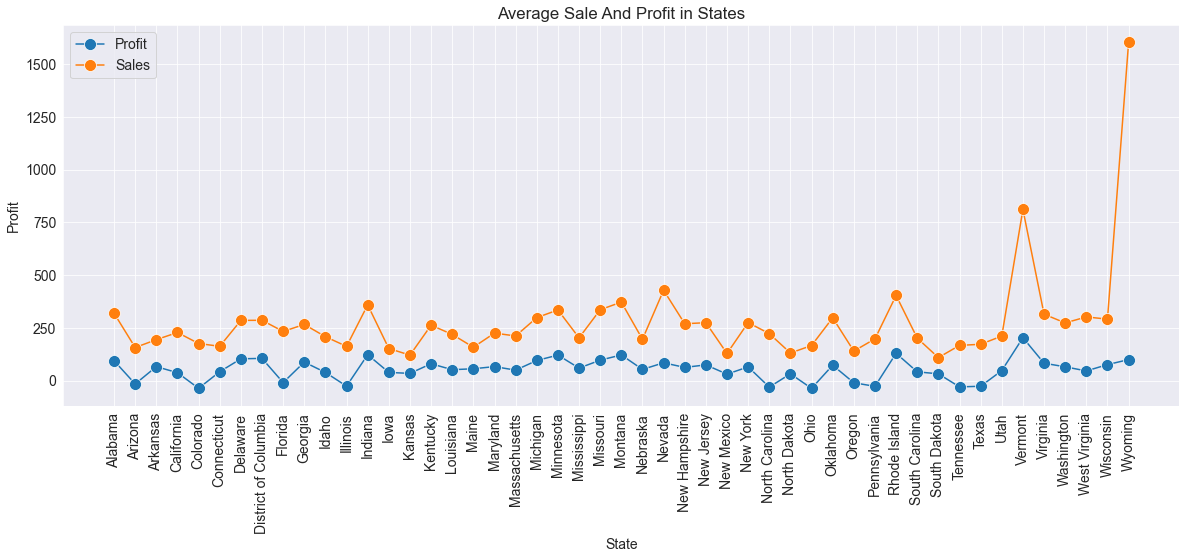

In [47]:
plt.figure(figsize=(20,7))
plt.title('Average Sale And Profit in States')
sns.lineplot(data=mean_by_state,x="State",y="Profit",marker='o',markersize =12);
sns.lineplot(data=mean_by_state,x="State",y="Sales",marker='o',markersize =12);
plt.legend(['Profit', 'Sales']);
plt.xticks(rotation=90)
plt.show();

### Comparing Profit of Different Cities

# RESULT AND CONCLUSION

 Profit is more than that of sale but there are some areas where profit could be increased.

- Profit is Maximum in First Class

- Sales is high for Same day ship

- Sub-category: Copier: High Profit & sales

- Category: Maximun sales and Profit obtain in Technology.

- Category: Minimun profit obtain in Furniture

- State: Vermont: Highest Profit

- State: Ohio: Lowest Profit

- Segment: Home-office: High Profit & sales

- Here is top 3 city where deals are Highest.

    1. New York City

    2. Los Angeles

    3. Philadelphia

- Here is top 3 state where deals are Highest.

    1. Califonia

    2. New York

    3. Texas